In [11]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

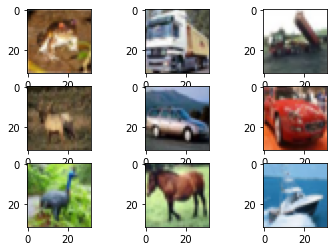

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [15]:
datagen = ImageDataGenerator(
    rotation_range=75,
    horizontal_flip=True,
    width_shift_range=1,
    height_shift_range=1
    #zoom_range=0.3
    )
datagen.fit(x_train)

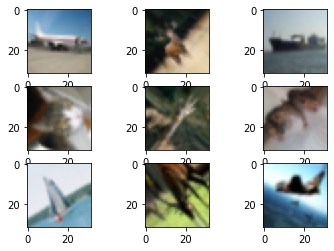

In [16]:
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [17]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [18]:
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [19]:
num_classes=10
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

In [20]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [24]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer="adam")

In [25]:
history=model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
391/391 [==============================] - 15s 12ms/step - loss: 1.5943 - accuracy: 0.4641 - val_loss: 1.2312 - val_accuracy: 0.5735
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 1.1661 - accuracy: 0.5897 - val_loss: 1.2088 - val_accuracy: 0.5717
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0144 - accuracy: 0.6438 - val_loss: 1.0678 - val_accuracy: 0.6284
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9025 - accuracy: 0.6812 - val_loss: 1.0326 - val_accuracy: 0.6372
Epoch 5/20
391/391 [==============================] - 4s 11ms/step - loss: 0.8052 - accuracy: 0.7166 - val_loss: 1.0190 - val_accuracy: 0.6468
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.7094 - accuracy: 0.7520 - val_loss: 1.0153 - val_accuracy: 0.6591
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.6284 - accuracy: 0.7778 - val_loss: 1.0507 - val_accuracy: 0.652

In [30]:
train_acc=model.evaluate(x_test,y_test,batch_size=128)
train_acc

79/79 [==============================] - 1s 7ms/step - loss: 1.3779 - accuracy: 0.6548


[1.3779386281967163, 0.6547999978065491]

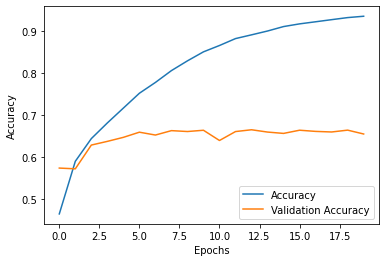

In [28]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")

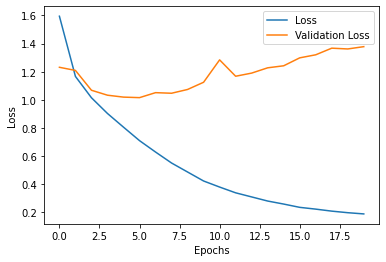

In [29]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")